# Identifying Entities in Healthcare Data

## Workspace set up: Import and Install useful packages.

In [1]:
#!pip install pycrf
#!pip install sklearn-crfsuite

import spacy
import sklearn_crfsuite
from sklearn_crfsuite import metrics
import numpy as np
import pandas as pd
from collections import Counter

model = spacy.load("en_core_web_sm")

## Data Preprocessing

The dataset provided is in the form of one word per line. Let's understand the format of data below:
- Suppose there are *x* words in a sentence, then there will be *x* continuous lines with one word in each line. 
- Further, the two sentences are separated by empty lines. The labels for the data follow the same format.

**We need to pre-process the data to recover the complete sentences and their labels.**


### Construct the proper sentences from individual words and print the 5 sentences.

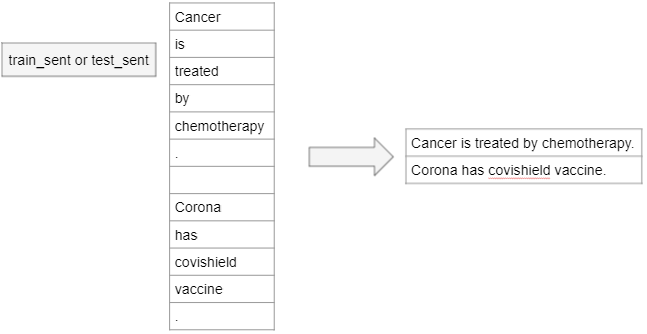

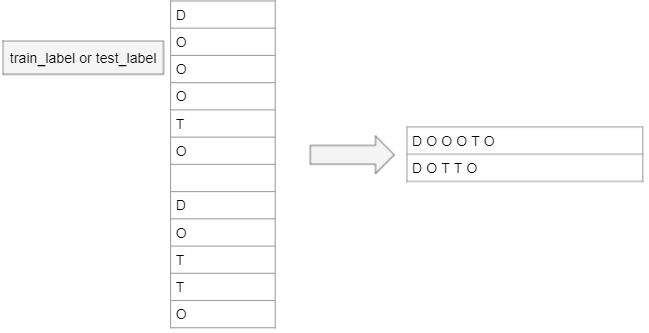

In [2]:
with open('train_sent', 'r') as train_sent_file:
  train_sentences = train_sent_file.readlines()

In [3]:
with open('train_label', 'r') as train_label_file:
  train_labels = train_label_file.readlines()

In [4]:
len(train_sentences)

48501

In [5]:
len(train_labels)

48501

In [6]:
empty_lines = [i for i in train_sentences if i == '\n']

In [161]:
len(empty_lines)

2599

In [8]:
sentence = []
label = []
cnt = 0
train_data = pd.DataFrame(columns=['sentence','label'])
for idx in range(len(train_sentences)):
    if train_sentences[idx] != '\n':
        sentence.append(train_sentences[idx].rstrip('\n'))
        label.append(train_labels[idx].rstrip('\n'))
    else:
        train_data.loc[cnt] = [sentence,label]
        cnt = cnt+1
        sentence = []
        label = []

print("Sentence Count: ", cnt)

Sentence Count:  2599


In [9]:
with open('test_sent', 'r') as test_sent_file:
  test_sentences = test_sent_file.readlines()

In [10]:
with open('test_label', 'r') as test_label_file:
  test_labels = test_label_file.readlines()

In [11]:
sentence = []
label = []
cnt = 0
test_data = pd.DataFrame(columns=['sentence','label'])
for idx in range(len(test_sentences)):
    if test_sentences[idx] != '\n':
        sentence.append(test_sentences[idx].rstrip('\n'))
        label.append(test_labels[idx].rstrip('\n'))
    else:
        test_data.loc[cnt] = [sentence,label]
        cnt = cnt+1
        sentence = []
        label = []

print("Sentence Count: ", cnt)

Sentence Count:  1056


### Count the number of sentences in the processed train and test dataset 

In [12]:
train_data.shape

(2599, 2)

In [13]:
test_data.shape

(1056, 2)

In [14]:
train_data.head(50)

,sentence,label
0,"[All, live, births, >, or, =, 23, weeks, at, t...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
1,"[The, total, cesarean, rate, was, 14.4, %, (, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2,"[Abnormal, presentation, was, the, most, commo...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
3,"[The, ``, corrected, '', cesarean, rate, (, ma...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
4,"[Arrest, of, dilation, was, the, most, common,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
5,"[Cesarean, rates, at, tertiary, care, hospital...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
6,"[In, the, third, trimester, ,, the, amniotic, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
7,"[We, hypothesize, that, as, temperature, incre...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
8,"[From, June, 11, to, August, 16, ,, 1993, ,, d...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
9,"[The, daily, high, ambient, temperature, in, o...","[O, O, O, O, O, O, O, O, O, O, O, O]"


### Count the number of lines of labels in the processed train and test dataset.

In [15]:
len(train_data.label)

2599

In [16]:
len(test_data.label)

1056

In [17]:
for i in range(len(train_data.sentence[20])):
    print(train_data.sentence[20][i],' [',train_data.label[20][i],']')


Down  [ D ]
syndrome  [ D ]
(  [ O ]
12  [ O ]
cases  [ O ]
)  [ O ]
and  [ O ]
Edward  [ D ]
syndrome  [ D ]
(  [ O ]
11  [ O ]
cases  [ O ]
)  [ O ]
were  [ O ]
the  [ O ]
most  [ O ]
common  [ O ]
trisomies  [ D ]
,  [ O ]
while  [ O ]
4  [ O ]
cases  [ O ]
of  [ O ]
Patau  [ D ]
syndrome  [ D ]
were  [ O ]
also  [ O ]
diagnosed  [ O ]


## Concept Identification

We will first explore what are the various concepts present in the dataset. For this, we will use PoS Tagging. 



### Extract those tokens which have NOUN or PROPN as their PoS tag and find their frequency

In [18]:
sentence_list = train_data.sentence
len(sentence_list)

2599

In [19]:
train_sent = []
for i in sentence_list:
    train_sent.append(' '.join(i))

In [20]:
train_sent[0]

'All live births > or = 23 weeks at the University of Vermont in 1995 ( n = 2395 ) were retrospectively analyzed for delivery route , indication for cesarean , gestational age , parity , and practice group ( to reflect risk status )'

In [21]:
len(train_sent)

2599

In [22]:
noun_counter = Counter()
propn_counter = Counter()

In [23]:
for sent in train_sent:
    doc = model(sent)
    
    for token in doc:
        if token.pos_ == 'NOUN':
            noun_counter[token.text] += 1
        elif token.pos_ == 'PROPN':
            propn_counter[token.text] += 1


In [24]:
print(noun_counter)

Counter({'patients': 354, 'treatment': 195, '%': 161, 'cancer': 135, 'therapy': 120, 'disease': 105, 'study': 103, 'cell': 99, 'lung': 86, 'chemotherapy': 65, 'group': 63, 'effects': 61, 'gene': 54, 'results': 54, 'use': 53, 'surgery': 51, 'survival': 50, 'risk': 49, 'women': 48, 'care': 47, 'analysis': 47, 'children': 47, 'activity': 47, 'rate': 46, 'cases': 46, 'dose': 46, 'years': 45, 'syndrome': 45, 'cells': 45, 'combination': 44, 'patient': 44, 'health': 44, 'effect': 43, 'response': 43, 'protein': 42, 'diagnosis': 40, 'data': 40, 'studies': 40, 'term': 39, 'bone': 39, 'infection': 37, 'carcinoma': 37, 'trial': 37, 'case': 36, 'evidence': 36, 'age': 34, 'management': 34, 'months': 33, 'role': 32, 'P': 30, 'stage': 30, 'time': 30, 'vaccine': 30, 'medicine': 29, 'control': 29, 'blood': 29, 'tumor': 29, 'methods': 28, 'tumors': 28, 'CONCLUSIONS': 28, 'drug': 28, 'failure': 28, 'weeks': 27, 'day': 27, 'year': 27, 'growth': 27, 'RESULTS': 27, 'heart': 27, 'pregnancy': 27, 'trials': 27,

In [25]:
print(propn_counter)

Counter({'TO_SEE': 54, 'HIV': 23, 'METHODS': 19, 'A': 16, 'B': 16, 'CO2': 16, 'C': 15, 'II': 14, 'nsclc': 14, 'preeclampsia': 12, 'Study': 12, 'Group': 12, 'G': 11, 'CONCLUSION': 11, 'Use': 11, 'mg': 10, 'L.': 10, 'S': 10, 'fatty': 10, 'American': 10, 'AIDS': 10, 'International': 9, 'ng': 9, 'PAI-1': 9, 'mL': 9, '-': 8, 'National': 8, 'Health': 8, 'D3': 8, 'Society': 8, 'interferon': 8, 'Hodgkin': 8, 'cisplatin': 8, 'm2': 8, 'Alzheimer': 7, 'September': 7, 'Parkinson': 7, 'rep': 7, 'DSB': 7, 'III': 7, 'USA': 7, 'p1': 7, 'Prevention': 7, 'Adolescent': 7, 'Clinical': 7, 'hepatitis': 7, 'MCV': 7, 'University': 6, 'New': 6, 'Association': 6, 'DNA': 6, 'MAIN': 6, 'BRCA1': 6, 'MEASURES': 6, 'Cancer': 6, 'serum': 6, 'PCR': 6, 'P': 6, 'CSF': 6, 'PURPOSE': 6, 'HIV-1': 6, 'ii': 6, 'AFI': 5, 'August': 5, 'Medical': 5, 'Disease': 5, 'MS': 5, 'T': 5, 'roxithromycin': 5, 'PIBF': 5, 'Medicine': 5, 'I': 5, 'al': 5, 'United': 5, 'IGF-1': 5, 'mmol': 5, 'Pima': 5, 'Indians': 5, 'glutamine': 5, 'Darier': 

### Print the top 25 most common tokens with NOUN or PROPN PoS tags

In [26]:
noun_counter.most_common(25)

[('patients', 354),
 ('treatment', 195),
 ('%', 161),
 ('cancer', 135),
 ('therapy', 120),
 ('disease', 105),
 ('study', 103),
 ('cell', 99),
 ('lung', 86),
 ('chemotherapy', 65),
 ('group', 63),
 ('effects', 61),
 ('gene', 54),
 ('results', 54),
 ('use', 53),
 ('surgery', 51),
 ('survival', 50),
 ('risk', 49),
 ('women', 48),
 ('care', 47),
 ('analysis', 47),
 ('children', 47),
 ('activity', 47),
 ('rate', 46),
 ('cases', 46)]

In [27]:
propn_counter.most_common(25)

[('TO_SEE', 54),
 ('HIV', 23),
 ('METHODS', 19),
 ('A', 16),
 ('B', 16),
 ('CO2', 16),
 ('C', 15),
 ('II', 14),
 ('nsclc', 14),
 ('preeclampsia', 12),
 ('Study', 12),
 ('Group', 12),
 ('G', 11),
 ('CONCLUSION', 11),
 ('Use', 11),
 ('mg', 10),
 ('L.', 10),
 ('S', 10),
 ('fatty', 10),
 ('American', 10),
 ('AIDS', 10),
 ('International', 9),
 ('ng', 9),
 ('PAI-1', 9),
 ('mL', 9)]

## Performing some more EDA on the data

In [28]:
train_data_with_treatment = train_data[train_data['label'].apply(lambda x: 'T' in x)]

In [29]:
train_data_with_treatment.shape

(849, 2)

In [30]:
train_data_with_disease = train_data[train_data['label'].apply(lambda x: 'D' in x)]

In [31]:
train_data_with_disease.shape

(1158, 2)

In [32]:
train_data_with_disease_treatment = train_data[train_data['label'].apply(lambda x: 'D' in x and 'T' in x)]

In [33]:
train_data_with_disease_treatment.shape

(718, 2)

In [34]:
pd.set_option('display.max_colwidth', None)

In [35]:
sent_data = train_data_with_disease_treatment.iloc[2]
print(sent_data)

sentence    [<, TO_SEE, >, CONCLUSIONS, :, Genetic, predisposition, has, a, substantial, impact, on, risk, of, subsequent, cancers, in, retinoblastoma, patients, ,, which, is, further, increased, by, radiation, treatment]
label                                                                                                                                       [O, O, O, O, O, O, O, O, O, O, O, O, O, O, D, D, O, D, O, O, O, O, O, O, O, T, T]
Name: 95, dtype: object


In [36]:
doc = model(' '.join(sent_data.sentence))
pos_list = []
for token in doc:
    pos_list.append(token.pos_)
print(pos_list)

['X', 'PROPN', 'X', 'NOUN', 'PUNCT', 'ADJ', 'NOUN', 'VERB', 'DET', 'ADJ', 'NOUN', 'ADP', 'NOUN', 'ADP', 'ADJ', 'NOUN', 'ADP', 'NOUN', 'NOUN', 'PUNCT', 'PRON', 'AUX', 'ADV', 'VERB', 'ADP', 'NOUN', 'NOUN']


In [37]:
train_data_with_disease_or_treatment = train_data[train_data['label'].apply(lambda x: 'D' in x or 'T' in x)]

In [38]:
train_data_with_disease_or_treatment.shape

(1289, 2)

In [39]:
sent_data = train_data_with_disease_or_treatment.iloc[2]
print(sent_data)

doc = model(' '.join(sent_data.sentence))
pos_list = []
for token in doc:
    pos_list.append(token.pos_)
print(pos_list)

sentence    [We, conclude, that, to, reduce, the, rate, of, macrosomic, infants, in, gestational, diabetes, cases, ,, good, glycemic, control, should, be, initiated, before, 34, completed, gestational, weeks]
label                                                                                                                             [O, O, O, O, O, O, O, O, D, D, D, D, D, D, O, T, T, T, O, O, O, O, O, O, O, O]
Name: 18, dtype: object
['PRON', 'VERB', 'PRON', 'PART', 'VERB', 'DET', 'NOUN', 'ADP', 'ADJ', 'NOUN', 'ADP', 'ADJ', 'NOUN', 'NOUN', 'PUNCT', 'ADJ', 'ADJ', 'NOUN', 'AUX', 'AUX', 'VERB', 'ADP', 'NUM', 'VERB', 'ADJ', 'NOUN']


In [40]:
noun_noun_ctr = Counter()
adj_noun_noun_ctr = 0
for data in train_data_with_disease_or_treatment.itertuples():
    sent = ' '.join(data.sentence)
    doc = model(sent)
    pos_list = [token.pos_ for token in doc]
    pos_list_joined = '-'.join(pos_list)
    if 'NOUN-NOUN' in pos_list_joined:
        noun_noun_ctr[2] += 1
    if 'NOUN-NOUN-NOUN' in pos_list_joined:
        noun_noun_ctr[3] += 1
    if 'NOUN-NOUN-NOUN-NOUN' in pos_list_joined:
        noun_noun_ctr[4] += 1
    if 'ADJ-NOUN-NOUN' in pos_list_joined:
        adj_noun_noun_ctr += 1

In [41]:
print(noun_noun_ctr)
print(adj_noun_noun_ctr)

Counter({2: 780, 3: 188, 4: 25})
326


## Defining features for CRF





In [42]:
# Let's define the function to get the feature value for one word.
def getFeaturesForOneWord(sentence, pos):
    word = sentence[pos]
    doc = model(' '.join(sentence))
    pos_tags = [token.pos_ for token in doc]
    
    
    features = [
        'word_lower=' + word.lower(),                       # serves as word ID
        'word[-3:]=' + word[-3:],                           # last 3 characters
        'word[-4:]=' + word[-4:],                           # last 4 characters
        'word.isupper()=%s' % word.isupper(),               # is the word all uppercase
        'word.startsWithCapital=%s' % word[0].isupper(),    # is the first letter capital
        'word.prefix=' + word[:3],                           # first 3 characters
        'word.pos=' + pos_tags[pos]                          # pos tag for the word
        
    ]
    
    if(pos > 0):
        prev_word = sentence[pos-1]
        features.extend([
        'prev_word.lower=' + prev_word.lower(),                    #previous word
        'prev_word.isupper=%s' % prev_word.isupper(),              #if previous word is upper case
        'prev_word.startsWithCapital=%s' % prev_word[0].isupper(), #if previous word is capitalized
        'prev_word.pos=' + pos_tags[pos-1]                          #pos tag of previous word
      ])
    else:
        features.append('BEG')                             # feature to track begin of sentence 

    if(pos == len(sentence)-1):
        features.append('END')                             # feature to track end of sentence
    else:
        next_word = sentence[pos+1]
        features.extend([
        'next_word.lower=' + next_word.lower(),                   #next word
        'next_word.pos=' + pos_tags[pos+1]                         #pos tag of next word
      ])

    return features

## Getting the features

### Write a code/function to get the features for a sentence

In [43]:
# Write a code to get features for a sentence.
def getFeaturesForOneSentence(sentence):
    sentence_list = sentence.split()
    return [getFeaturesForOneWord(sentence_list,pos) for pos in range(len(sentence_list))]

### Write a code/function to get the labels of a sentence

In [44]:
# Write a code to get the labels for a sentence.
train_data.label

0       [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]
1                                                                   [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]
2                                                                                                 [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]
3                            [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]
4                                                                            [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]
                                                                         ...                                                                   
2594                                                                                        [O, O, O, O, O, O, O, O, O, T, T, T, O, O, O

In [45]:
train_data.sentence = train_data.sentence.apply(lambda x: ' '.join(x))

In [46]:
train_data.head()

,sentence,label
0,"All live births > or = 23 weeks at the University of Vermont in 1995 ( n = 2395 ) were retrospectively analyzed for delivery route , indication for cesarean , gestational age , parity , and practice group ( to reflect risk status )","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
1,"The total cesarean rate was 14.4 % ( 344 of 2395 ) , and the primary rate was 11.4 % ( 244 of 2144 )","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
2,"Abnormal presentation was the most common indication ( 25.6 % , 88 of 344 )","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
3,"The `` corrected '' cesarean rate ( maternal-fetal medicine and transported patients excluded ) was 12.4 % ( 273 of 2194 ) , and the `` corrected '' primary rate was 9.6 % ( 190 of 1975 )","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
4,"Arrest of dilation was the most common indication in both `` corrected '' subgroups ( 23.4 and 24.6 % , respectively )","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"


In [47]:
# Apply function 'getFeaturesForOneSentence' to get features on a single sentence which is at index value 5 in train_sentences
example_sentence = train_data.iloc[5].sentence
print(example_sentence)

features = getFeaturesForOneSentence(example_sentence)
features[2]

Cesarean rates at tertiary care hospitals should be compared with rates at community hospitals only after correcting for dissimilar patient groups or gestational age


['word_lower=at',
 'word[-3:]=at',
 'word[-4:]=at',
 'word.isupper()=False',
 'word.startsWithCapital=False',
 'word.prefix=at',
 'word.pos=ADP',
 'prev_word.lower=rates',
 'prev_word.isupper=False',
 'prev_word.startsWithCapital=False',
 'prev_word.pos=NOUN',
 'next_word.lower=tertiary',
 'next_word.pos=ADJ']

In [48]:
example_sentence = ' '.join(train_data_with_disease_or_treatment.iloc[5].sentence)
print(example_sentence)

features = getFeaturesForOneSentence(example_sentence)
features[11]

Trisomy 21 presented with the following features : hydramnios , complex malformations , pyelectasis , and duodenal atresia


['word_lower=malformations',
 'word[-3:]=ons',
 'word[-4:]=ions',
 'word.isupper()=False',
 'word.startsWithCapital=False',
 'word.prefix=mal',
 'word.pos=NOUN',
 'prev_word.lower=complex',
 'prev_word.isupper=False',
 'prev_word.startsWithCapital=False',
 'prev_word.pos=ADJ',
 'next_word.lower=,',
 'next_word.pos=PUNCT']

In [49]:
test_data.sentence = test_data.sentence.apply(lambda x: ' '.join(x))

In [50]:
test_data.head(5)

,sentence,label
0,"Furthermore , when all deliveries were analyzed , regardless of risk status but limited to gestational age > or = 36 weeks , the rates did not change ( 12.6 % , 280 of 2214 ; primary 9.2 % , 183 of 1994 )","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
1,"As the ambient temperature increases , there is an increase in insensible fluid loss and the potential for dehydration","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
2,The daily high temperature ranged from 71 to 104 degrees F and AFI values ranged from 1.7 to 24.7 cm during the study period,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
3,"There was a significant correlation between the 2- , 3- , and 4-day mean temperature and AFI , with the 4-day mean being the most significant ( r = 0.31 , p & # 60 ; 0.001 )","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
4,Fluctuations in ambient temperature are inversely correlated to changes in AFI,"[O, O, O, O, O, O, O, O, O, O, O]"


## Define input and target variables


Correctly computing X and Y sequence matrices for training and test data.
Check that both sentences and labels are processed

### Define the features' values for each sentence as input variable  for CRF model in test and the train dataset 

In [51]:
%%time
X_train = [getFeaturesForOneSentence(sentence) for sentence in train_data.sentence]

CPU times: total: 6min 36s
Wall time: 6min 39s


In [52]:
%%time
X_test = [getFeaturesForOneSentence(sentence) for sentence in test_data.sentence]


CPU times: total: 2min 36s
Wall time: 2min 36s


In [53]:
len(X_train)

2599

In [54]:
len(X_test)

1056

### Define the labels as the target variable for test and the train dataset

In [55]:
Y_train = [label for label in train_data.label]

In [56]:
Y_test = [label for label in test_data.label]

In [57]:
len(Y_train)

2599

In [58]:
len(Y_test)

1056

## Build the CRF Model

In [59]:
# Build the CRF model.

crf = sklearn_crfsuite.CRF(max_iterations=300)
crf.fit(X_train, Y_train)

CRF(max_iterations=300)

## Evaluation

### Predict the labels of each of the tokens in each sentence of the test dataset that has been pre processed earlier.

In [60]:
Y_pred = crf.predict(X_test)

### Calculate the f1 score using the actual labels and the predicted labels of the test dataset.

In [61]:
metrics.flat_f1_score(Y_test, Y_pred, average = "weighted")

0.9196471484226435

In [62]:
metrics.flat_accuracy_score(Y_test, Y_pred)

0.9251262219357611

## Enhance model performance

In [63]:
train_data_split = train_data.copy()

In [64]:
train_data_split.head()

,sentence,label
0,"All live births > or = 23 weeks at the University of Vermont in 1995 ( n = 2395 ) were retrospectively analyzed for delivery route , indication for cesarean , gestational age , parity , and practice group ( to reflect risk status )","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
1,"The total cesarean rate was 14.4 % ( 344 of 2395 ) , and the primary rate was 11.4 % ( 244 of 2144 )","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
2,"Abnormal presentation was the most common indication ( 25.6 % , 88 of 344 )","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
3,"The `` corrected '' cesarean rate ( maternal-fetal medicine and transported patients excluded ) was 12.4 % ( 273 of 2194 ) , and the `` corrected '' primary rate was 9.6 % ( 190 of 1975 )","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
4,"Arrest of dilation was the most common indication in both `` corrected '' subgroups ( 23.4 and 24.6 % , respectively )","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"


In [65]:
train_data_split.sentence = train_data_split.sentence.apply(lambda x: x.split())

In [66]:
train_data_split.head()

,sentence,label
0,"[All, live, births, >, or, =, 23, weeks, at, the, University, of, Vermont, in, 1995, (, n, =, 2395, ), were, retrospectively, analyzed, for, delivery, route, ,, indication, for, cesarean, ,, gestational, age, ,, parity, ,, and, practice, group, (, to, reflect, risk, status, )]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
1,"[The, total, cesarean, rate, was, 14.4, %, (, 344, of, 2395, ), ,, and, the, primary, rate, was, 11.4, %, (, 244, of, 2144, )]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
2,"[Abnormal, presentation, was, the, most, common, indication, (, 25.6, %, ,, 88, of, 344, )]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
3,"[The, ``, corrected, '', cesarean, rate, (, maternal-fetal, medicine, and, transported, patients, excluded, ), was, 12.4, %, (, 273, of, 2194, ), ,, and, the, ``, corrected, '', primary, rate, was, 9.6, %, (, 190, of, 1975, )]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
4,"[Arrest, of, dilation, was, the, most, common, indication, in, both, ``, corrected, '', subgroups, (, 23.4, and, 24.6, %, ,, respectively, )]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"


In [67]:
## Extract disease list from train data
disease_list = []
for data in train_data_split.itertuples():
    doc = model(' '.join(data.sentence))
    pos_tags = [token.pos_ for token in doc]
    for i, label in enumerate(data.label):
        if label == 'D' and pos_tags[i] == 'NOUN':
            disease_list.append(data.sentence[i])
            #print(data.sentence[i])

In [68]:
## Extract treatment list from train data
treatment_list = []
for data in train_data_split.itertuples():
    doc = model(' '.join(data.sentence))
    pos_tags = [token.pos_ for token in doc]
    for i, label in enumerate(data.label):
        if label == 'T' and pos_tags[i] == 'NOUN':
            treatment_list.append(data.sentence[i])
            #print(data.sentence[i])

In [69]:
disease_list_unique = list(set(disease_list))

In [70]:
treatment_list_unique = list(set(treatment_list))

In [71]:
print(disease_list_unique)

['stridor', 'oesophagitis', 'cysts', 'leukoencephalopathy', "'s", 'large', 'postpartum', 'goiter', 'head', 'meningococcus-induced', 'vein', 'epidemic', 'cancer', 'effusion', 'postinfarction', 'tc', 'injuries', 'plant', 'nerve', 'Fever', 'neutropenia', 'mucin-producing', 'tract', 'metaplasia', 'obliterans', 'sarcomas', 'cold', 'gravis', 'hernia', 'viremia', 'pneumonia', 'infarct', 'bleeding', 'erythematosus', 'Malnutrition', 'patients', 'H.', ')', 'ld', 'fever', '(', 'cardiac', 'non-Hodgkin', 'infant', 'hypersplenism', 'perforations', 'hiccups', 'restenosis', 'osteoarthritis', 'Carbon', 'partial', 'dysfunctioning', 'n2', 'infarctions', 'plaque', 'non-small', 'throat', 'PROM', 'constipation', 'otitis', 'seizure', 'endometriosis', 'meningitis', 'MCV', 'defects', 'cancers', 'intolerance', 'type', 'hepatic', 'bradycardia', 'resistant', 'histiocytosis', 'revascularizations', 'oxide', 'lichen', 'lymphomas', 'spinal', 'viverrid-type', 'abscesses', 'paracolostomy', 'muscle', 'tuberculosis', 'in

In [72]:
len(disease_list_unique)

640

In [73]:
from nltk.corpus import stopwords

In [74]:
# removing stopwords from disease_list_unique
disease_list_unique = [d for d in disease_list_unique if d not in stopwords.words('english')]

In [75]:
len(disease_list_unique)

631

In [76]:
print(treatment_list_unique)

['implantation', 'hemostasis', 'megakaryocyte', 'vaccines', 'gemcitabine', 'clearance', 'autologous', 'video-endoscopic', 'protein-polysaccharide', 'eicosapentanoic', 'leukocyte', 'resections', 'ribavirin/interferon-alpha', 'nerve', 'derivatives', 'wall-active', 'Magnesium', 'pressure-reducing', 'coils', 'irrigation', 'TJ-135', 'metabolites', 'nitroglycerin', 'approaches', 'donor', 'placebo', 'anticoagulants', 'intervention', 'lungs', 'urethroplastym', ')', 'UFH', 'fluticasone', '(', 'sperm', 'propionate', 'scolymus', 'dacarbazine', 'gamma', 'partial', 'sling', 'Cell-based', 'gks', 'paste', 'pancreas-/kidney', 'Thalidomide', 'antidepressants', 'praziquantel', 'bupivacaine', 'vinorelbine', 'anticoagulation', 'poplar', 'Vaccination', 'interferon', 'injection', 'videothoracoscopic', 'capsulorrhaphy', 'plate', 'hormone', 'aspiration', 'Splenectomy', 'muscle', 'TP', 'immunization', 'inhibitor', 'prednisolone', 'fluoride', 'pulmonectomy', 'pancreatectomy', '1', 'isoprenaline', 'radiology', '

In [77]:
len(treatment_list_unique)

616

In [78]:
# removing stopwords from treatment_list_unique
treatment_list_unique = [t for t in treatment_list_unique if t not in stopwords.words('english')]

In [79]:
len(treatment_list_unique)

607

## Add more features based on the disease list and treatment list 

In [80]:
def getFeaturesForOneWord(sentence, pos):
    word = sentence[pos]
    doc = model(' '.join(sentence))
    pos_tags = [token.pos_ for token in doc]
    
    
    features = [
        'word_lower=' + word.lower(),                       # serves as word ID
        'word[-3:]=' + word[-3:],                           # last 3 characters
        'word[-4:]=' + word[-4:],                           # last 4 characters
        'word.isupper()=%s' % word.isupper(),               # is the word all uppercase
        'word.startsWithCapital=%s' % word[0].isupper(),    # is the first letter capital
        'word.prefix=' + word[:3],                           # first 3 characters
        'word.pos=' + pos_tags[pos],                          # pos tag for the word
        'word.disease=' + str(1 if word in disease_list_unique else 0),
        'word.treatment=' + str(1 if word in treatment_list_unique else 0)
    ]
    
    if(pos > 0):
        prev_word = sentence[pos-1]
        features.extend([
        'prev_word.lower=' + prev_word.lower(),                    #previous word
        'prev_word.isupper=%s' % prev_word.isupper(),              #if previous word is upper case
        'prev_word.startsWithCapital=%s' % prev_word[0].isupper(), #if previous word is capitalized
        'prev_word.pos=' + pos_tags[pos-1]                          #pos tag of previous word
      ])
    else:
        features.append('BEG')                             # feature to track begin of sentence 

    if(pos == len(sentence)-1):
        features.append('END')                             # feature to track end of sentence
    else:
        next_word = sentence[pos+1]
        features.extend([
        'next_word.lower=' + next_word.lower(),                   #next word
        'next_word.pos=' + pos_tags[pos+1]                         #pos tag of next word
      ])

    return features

In [81]:
example_sentence = ' '.join(train_data_with_disease_or_treatment.iloc[5].sentence)
print(example_sentence)

features = getFeaturesForOneSentence(example_sentence)
features[13]

Trisomy 21 presented with the following features : hydramnios , complex malformations , pyelectasis , and duodenal atresia


['word_lower=pyelectasis',
 'word[-3:]=sis',
 'word[-4:]=asis',
 'word.isupper()=False',
 'word.startsWithCapital=False',
 'word.prefix=pye',
 'word.pos=NOUN',
 'word.disease=1',
 'word.treatment=0',
 'prev_word.lower=,',
 'prev_word.isupper=False',
 'prev_word.startsWithCapital=False',
 'prev_word.pos=PUNCT',
 'next_word.lower=,',
 'next_word.pos=PUNCT']

In [82]:
# Write a code to get features for a sentence.
def getFeaturesForOneSentence(sentence):
    sentence_list = sentence.split()
    return [getFeaturesForOneWord(sentence_list,pos) for pos in range(len(sentence_list))]

## Define X_train and X_test based on new features

In [83]:
%%time
X_train2 = [getFeaturesForOneSentence(sentence) for sentence in train_data.sentence]

CPU times: total: 6min 43s
Wall time: 6min 46s


In [84]:
%%time
X_test2 = [getFeaturesForOneSentence(sentence) for sentence in test_data.sentence]

CPU times: total: 2min 36s
Wall time: 2min 36s


## Build and evaluate the model

In [85]:
# Build the CRF model.
crf2 = sklearn_crfsuite.CRF(max_iterations=300)
crf2.fit(X_train2, Y_train)

CRF(max_iterations=300)

In [86]:
Y_pred2 = crf2.predict(X_test2)

### Calculate the f1 score using the actual labels and the predicted labels of the test dataset.

In [87]:
metrics.flat_f1_score(Y_test, Y_pred2, average = "weighted")

0.9153200492508274

In [88]:
metrics.flat_accuracy_score(Y_test, Y_pred2)

0.9219572456762273

### Second model has slightly lower accuracy, lets use the predictions from the first model

## Identifying Diseases and Treatments using Custom NER

We now use the CRF model's prediction to prepare a record of diseases identified in the corpus and treatments used for the diseases.



### Create the logic to get all the predicted treatments (T) labels corresponding to each disease (D) label in the test dataset.

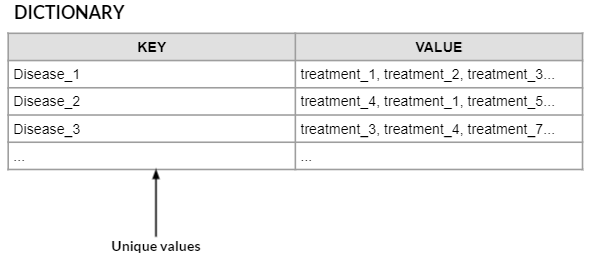

In [95]:
prediction_df = pd.DataFrame({'Sentence':test_data.sentence,'Label':Y_test,'Predicted_Label':Y_pred})

In [97]:
prediction_df.head()

,Sentence,Label,Predicted_Label
0,"Furthermore , when all deliveries were analyzed , regardless of risk status but limited to gestational age > or = 36 weeks , the rates did not change ( 12.6 % , 280 of 2214 ; primary 9.2 % , 183 of 1994 )","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
1,"As the ambient temperature increases , there is an increase in insensible fluid loss and the potential for dehydration","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
2,The daily high temperature ranged from 71 to 104 degrees F and AFI values ranged from 1.7 to 24.7 cm during the study period,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
3,"There was a significant correlation between the 2- , 3- , and 4-day mean temperature and AFI , with the 4-day mean being the most significant ( r = 0.31 , p & # 60 ; 0.001 )","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
4,Fluctuations in ambient temperature are inversely correlated to changes in AFI,"[O, O, O, O, O, O, O, O, O, O, O]","[O, O, O, O, O, O, O, O, O, O, O]"


In [98]:
prediction_df.shape

(1056, 3)

In [99]:
predicted_data_with_disease_and_treatment = prediction_df[prediction_df['Predicted_Label'].apply(lambda x: 'D' in x and 'T' in x)]

In [100]:
predicted_data_with_disease_and_treatment.shape

(153, 3)

In [101]:
predicted_data_with_disease_and_treatment.head()

,Sentence,Label,Predicted_Label
5,"This study tested the hypothesis that to reduce the rate of macrosomic infants in gestational diabetes cases , good glycemic control should be initiated before 34 completed gestational weeks","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[O, O, O, O, O, O, O, O, O, O, O, D, D, D, D, D, D, O, T, T, T, O, O, O, O, O, O, O, O]"
46,"< TO_SEE > CONTEXT : There is a substantial risk of a second cancer for persons with hereditary retinoblastoma , which is enhanced by radiotherapy","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, D, O, O, O, O, O, T]"
61,CONCLUSION : Methylphenidate is effective in treating children with epilepsy and ADHD and safe in children who are seizure free,"[O, O, T, O, O, O, O, O, O, D, O, D, O, O, O, O, O, O, O, O]","[O, O, T, O, O, O, O, O, O, D, O, O, O, O, O, O, O, O, O, O]"
68,"At 293 sites , we randomly assigned 8803 patients who had had myocardial infarction , treatment with 160 mg aspirin , 3 mg warfarin with 80 mg aspirin , or 1 mg warfarin with 80 mg aspirin","[O, O, O, O, O, O, O, O, O, O, O, O, D, D, O, O, O, T, T, T, O, T, T, T, T, T, T, T, O, O, T, T, T, T, T, T, T]","[O, O, O, O, O, O, O, O, O, O, O, O, D, D, O, O, O, O, O, T, O, O, O, T, T, T, T, T, T, T, T, T, T, T, T, T, T]"
71,"METHODS : The effect of roxithromycin was assessed in a double-blind , randomised , prospective , multicentre , parallel-group , placebo-controlled pilot study of 202 patients with unstable angina or non-Q-wave myocardial infarction","[O, O, O, O, O, T, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, D, D, O, D, D, D]","[O, O, O, O, O, T, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, D, D, D, D, D, D]"


In [104]:
def find_first_continuous_occurrence(lst, char):
    start = None
    
    for i, item in enumerate(lst):
        if item == char:
            if start is None:
                start = i  # Start of the continuous occurrence
        else:
            if start is not None:
                if start == i - 1:  # Only one occurrence
                    return start, start
                return start, i - 1  # End of the continuous occurrence
    
    # If the continuous occurrence ends at the last element
    if start is not None:
        if start == len(lst) - 1:  # Only one occurrence at the end
            return start, start
        return start, len(lst) - 1

In [122]:
predicted_treatment_df = pd.DataFrame(columns=['Disease', 'Treatment'])
cnt = 0
for data in predicted_data_with_disease_and_treatment.itertuples():
    start_D, end_D = find_first_continuous_occurrence(data.Predicted_Label,'D')
    disease=[]
    #if start_D != 0:
    #    start_D = start_D-1
    for i in range(start_D,end_D+1):
        disease.append(data.Sentence.split()[i])
    start_T, end_T = find_first_continuous_occurrence(data.Predicted_Label,'T')
    treatment=[]
    for i in range(start_T,end_T+1):
        treatment.append(data.Sentence.split()[i])
    predicted_treatment_df.loc[cnt] = [disease,treatment]
    cnt = cnt + 1

In [140]:
predicted_treatment_df.head()

,Disease,Treatment
0,"[macrosomic, infants, in, gestational, diabetes, cases]","[good, glycemic, control]"
1,[retinoblastoma],[radiotherapy]
2,[epilepsy],[Methylphenidate]
3,"[myocardial, infarction]",[aspirin]
4,"[unstable, angina, or, non-Q-wave, myocardial, infarction]",[roxithromycin]


In [178]:
predicted_treatment_df.shape

(153, 2)

In [ ]:
predicted_treatment_df_grouped = pd.DataFrame(columns=['Disease','Treatment'])
for data in predicted_treatment_df.itertuples:
    if data.Disease in predicted_treatment_df_grouped.Disease

### Predict the treatment for the disease name: 'hereditary retinoblastoma'

In [157]:
def get_predicted_treatment(input_disease):
    filtered_df = predicted_treatment_df[predicted_treatment_df['Disease'].apply(
        lambda disease: any(word in disease for word in input_disease.split()))]
    print(filtered_df)

In [158]:
get_predicted_treatment('hereditary retinoblastoma')

            Disease       Treatment
1  [retinoblastoma]  [radiotherapy]


In [159]:
get_predicted_treatment('diabetes')

                                                     Disease  \
0    [macrosomic, infants, in, gestational, diabetes, cases]   
136                                     [diabetes, mellitus]   

                     Treatment  
0    [good, glycemic, control]  
136             [troglitazone]  


In [160]:
get_predicted_treatment('myocardial infarction')

                                                        Disease  \
3                                      [myocardial, infarction]   
4    [unstable, angina, or, non-Q-wave, myocardial, infarction]   
105                             [acute, myocardial, infarction]   
143                             [acute, myocardial, infarction]   

                     Treatment  
3                    [aspirin]  
4              [roxithromycin]  
105    [Thrombolytic, therapy]  
143  [thrombolytic, treatment]  
